<a href="https://colab.research.google.com/github/MonickWeber/QuarentenaDados/blob/master/QuarentenaNotasFilmes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/MonickWeber/QuarentenaDados/master/filmes/ratings.csv')
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [46]:
filmes = pd.read_csv('https://raw.githubusercontent.com/MonickWeber/QuarentenaDados/master/filmes/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.columns

Index(['filmeId', 'titulo', 'generos'], dtype='object')

In [48]:
avaliacoes.shape
#linhas, colunas

(100836, 4)

In [49]:
len(avaliacoes)

100836

In [50]:
avaliacoes.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [51]:
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
avaliacoes.head()


,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [52]:
avaliacoes_filme_1 = avaliacoes.query('filmeId==1')
avaliacoes_filme_1

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [53]:
avaliacoes_filme_1.describe()


,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [54]:
avaliacoes_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [55]:
avaliacoes_filme_1['nota'].mean()


3.9209302325581397

In [56]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [57]:
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [58]:
#agrupando as medias dos filmes para cada filme

notas_medias_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [59]:
filmes_com_media = filmes.join(notas_medias_por_filme, on='filmeId')
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [60]:
filmes_com_media.sort_values('nota', ascending= False)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


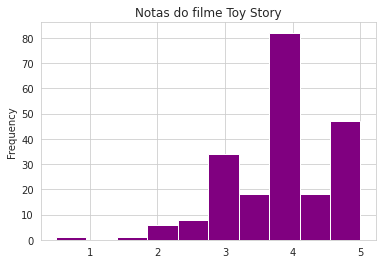

In [61]:
avaliacoes.query('filmeId == 1')['nota'].plot(kind='hist', title= 'Notas do filme Toy Story', color = 'purple')

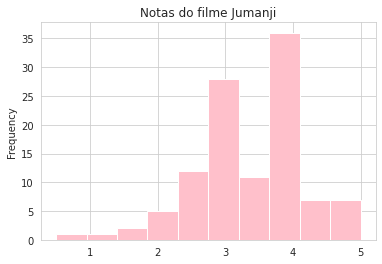

In [62]:
avaliacoes.query('filmeId == 2')['nota'].plot(kind='hist', title= 'Notas do filme Jumanji', color = 'pink')


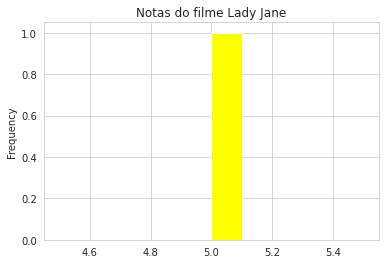

In [63]:
avaliacoes.query('filmeId == 6201')['nota'].plot(kind='hist', title= 'Notas do filme Lady Jane', color = 'yellow')

# DESAFIOS AULA 1

#Desafio 1
Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes

In [64]:
filmes_sem_nota = filmes_com_media.query('nota == "NaN"')
len(filmes_sem_nota)

18

#Desafio 2

Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join

In [65]:
filmes_com_media = filmes.join(notas_medias_por_filme, on='filmeId')
filmes_com_media = filmes_com_media.rename(columns={'nota': 'nota_media'})
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


#Desafio 3

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [66]:
total_avaliacao_por_filme = avaliacoes.groupby('filmeId')['nota'].count()
total_avaliacao_por_filme

#agora vamos agrupar esse dados com join
filmes_com_media_e_total = filmes_com_media.join(total_avaliacao_por_filme, on='filmeId')
filmes_com_media_e_total = filmes_com_media_e_total.rename(columns={'nota': 'total'})
filmes_com_media_e_total = filmes_com_media_e_total.sort_values('total', ascending= False)
filmes_com_media_e_total.head(15)


,filmeId,titulo,generos,nota_media,total
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238.0
97,110,Braveheart (1995),Action|Drama|War,4.031646,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224.0
461,527,Schindler's List (1993),Drama|War,4.225000,220.0


#Desafio 4

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [67]:
filmes_com_media_e_total = filmes_com_media_e_total.round({"nota_media":2})
filmes_com_media_e_total


,filmeId,titulo,generos,nota_media,total
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.0
...,...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN,NaN


#Desafio 5

Descobrir os generos dos filmes (quais são eles, únicos)

In [68]:
fimes_genero_unico = filmes_com_media_e_total[~filmes_com_media_e_total["generos"].str.contains('\|')]
fimes_genero_unico


,filmeId,titulo,generos,nota_media,total
398,457,"Fugitive, The (1993)",Thriller,3.99,190.0
302,344,Ace Ventura: Pet Detective (1994),Comedy,3.04,161.0
896,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4.20,133.0
2195,2918,Ferris Bueller's Day Off (1986),Comedy,3.84,109.0
957,1258,"Shining, The (1980)",Horror,4.08,109.0
...,...,...,...,...,...
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN,NaN


#Desafio 6

Contar o número de aparições de cada genero de todos os filmes

In [69]:
generos_dos_filmes = filmes_com_media_e_total['generos']

todos_generos_dos_filmes = [] 

for generos in generos_dos_filmes:
  generos = generos.split("|")
  for genero in generos: 
    todos_generos_dos_filmes.append(genero) 


todos_generos_dos_filmes = dict((i, todos_generos_dos_filmes.count(i)) for i in todos_generos_dos_filmes) 
todos_generos_dos_filmes


{'(no genres listed)': 34,
 'Action': 1828,
 'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Crime': 1199,
 'Documentary': 440,
 'Drama': 4361,
 'Fantasy': 779,
 'Film-Noir': 87,
 'Horror': 978,
 'IMAX': 158,
 'Musical': 334,
 'Mystery': 573,
 'Romance': 1596,
 'Sci-Fi': 980,
 'Thriller': 1894,
 'War': 382,
 'Western': 167}

Versão simplificada utilizando apenas uma biblioteca

In [70]:
total_generos = filmes['generos'].str.get_dummies('|').sum()
total_generos

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [71]:
total_generos = total_generos.sort_values(ascending= False)  #.sort para ordenar e = false p/ ser decrescente
total_generos

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [0]:
#total_generos.sort_index(ascending= False) #ordenando os nomes de Z a A

#Desafio 7

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

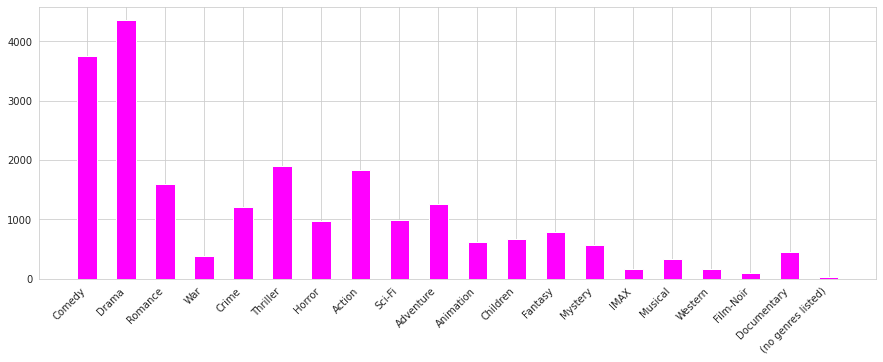

In [73]:
import matplotlib.pylab as plt
plt.figure(figsize=(15,5))
plt.bar(todos_generos_dos_filmes.keys(), todos_generos_dos_filmes.values(), 0.5, color='magenta')
plt.xticks(rotation=45, ha="right")

plt.show()

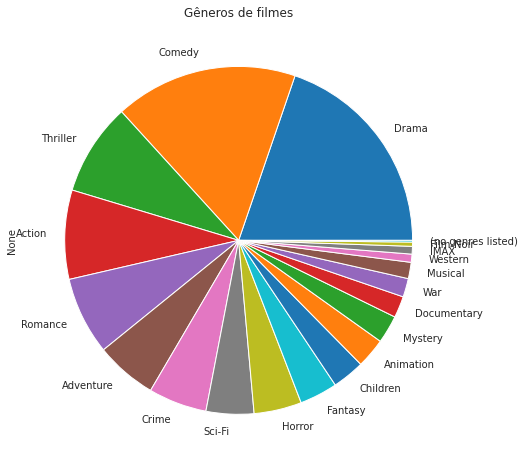

In [74]:
total_generos.plot(kind='pie', title= 'Gêneros de filmes', figsize=(8,8))
plt.show() 

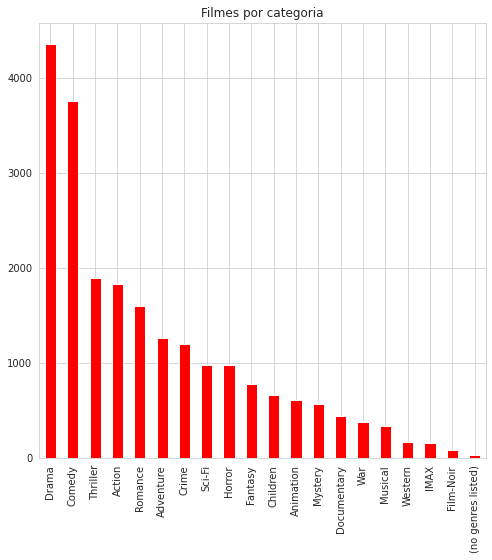

In [75]:
total_generos.plot(kind='bar', title= 'Filmes por categoria', figsize=(8,8), color='red')
plt.show()

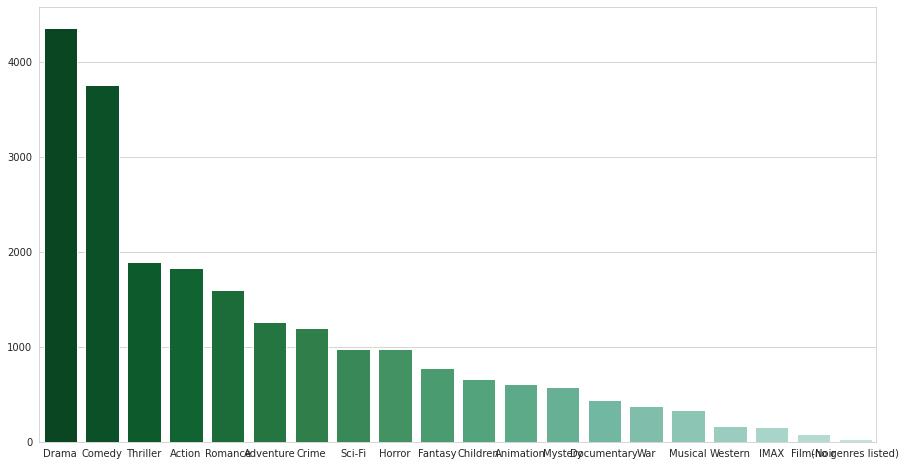

In [76]:
import seaborn as sns #new lib

sns.set_style("whitegrid") 
plt.figure(figsize=(15,8)) 
sns.barplot(x=total_generos.index, 
            y=total_generos.values,
            palette=sns.color_palette('BuGn_r', n_colors=len(total_generos)+7))
plt.show()

explicando o que fiz abaixo
criei uma função (p/ facilitar a vida, n ter q criar pra cada filme) para plotar o grafico de filmes x media, plotar o box plot e o return para ver os dados de mediana, media, max, min...

In [0]:
def plot_filme(n):
  notas_filme = avaliacoes.query(f"filmeId=={n}")["nota"] 
  notas_filme.plot(kind='hist')
  plt.show()
  notas_filme.plot.box()
  plt.show()
  print(notas_filme.describe())

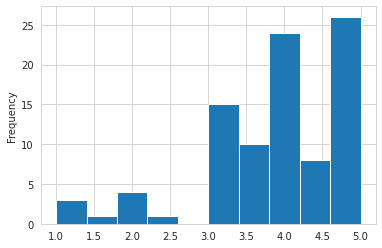

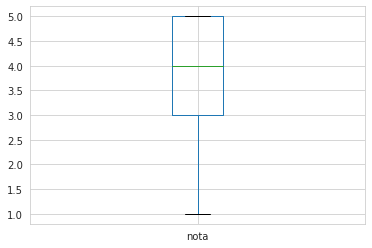

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64


In [78]:
plot_filme(919) 

#AULA 2

Desafio 1- Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

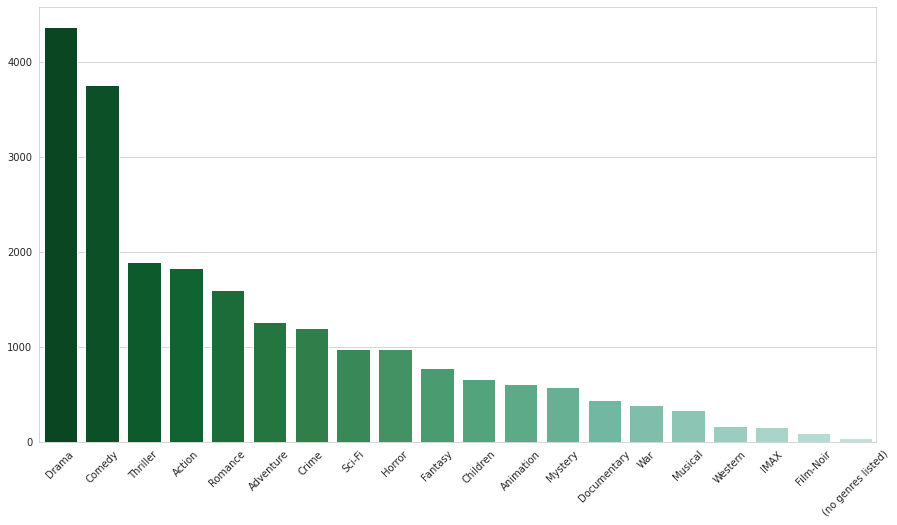

In [79]:
import seaborn as sns 

sns.set_style("whitegrid") 
plt.figure(figsize=(15,8)) 
sns.barplot(x=total_generos.index, 
            y=total_generos.values,
            palette=sns.color_palette('BuGn_r', n_colors=len(total_generos)+7))
            
plt.xticks(rotation=45)
plt.show()

DESAFIO 2 - Encontrar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

In [80]:
filmes_com_media_e_total.sort_values('nota_media', ascending=False)[5000:5020]

,filmeId,titulo,generos,nota_media,total
8220,103772,"Wolverine, The (2013)",Action|Adventure|Fantasy|Sci-Fi,3.38,16.0
7271,74685,"Crazies, The (2010)",Action|Drama|Horror|Sci-Fi|Thriller,3.38,4.0
6252,46967,Scoop (2006),Comedy|Fantasy|Mystery,3.38,4.0
1525,2057,"Incredible Journey, The (1963)",Adventure|Children,3.38,4.0
2021,2693,Trekkies (1997),Documentary,3.38,4.0
1112,1447,Gridlock'd (1997),Crime,3.38,4.0
3546,4850,Spriggan (Supurigan) (1998),Action|Animation|Sci-Fi,3.38,4.0
6993,67267,Sunshine Cleaning (2008),Comedy|Drama,3.38,4.0
3228,4359,"Seven Year Itch, The (1955)",Comedy,3.38,8.0
5829,32289,Ice Princess (2005),Children|Comedy|Drama,3.38,4.0


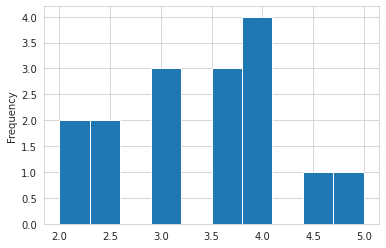

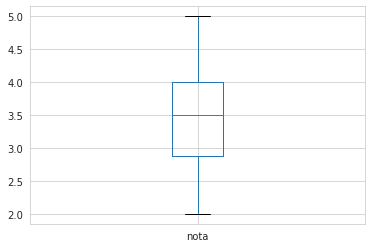

count    16.000000
mean      3.375000
std       0.866025
min       2.000000
25%       2.875000
50%       3.500000
75%       4.000000
max       5.000000
Name: nota, dtype: float64


In [81]:
plot_filme(103772) 

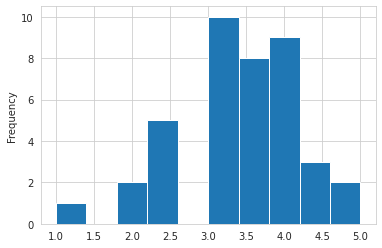

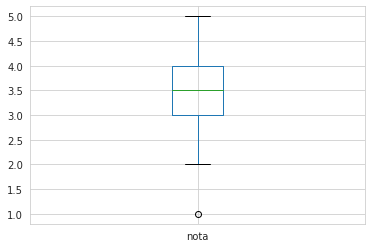

count    40.000000
mean      3.375000
std       0.837808
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: nota, dtype: float64


In [82]:
plot_filme(33615) 

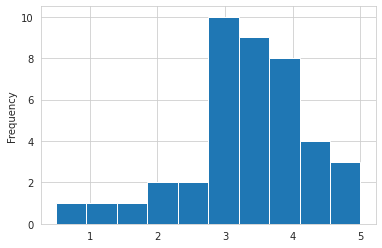

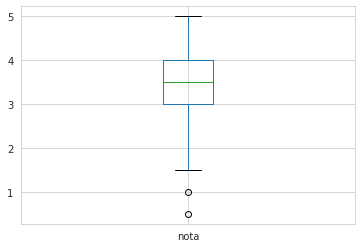

count    41.000000
mean      3.378049
std       1.004866
min       0.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: nota, dtype: float64


In [83]:
plot_filme(7373) 

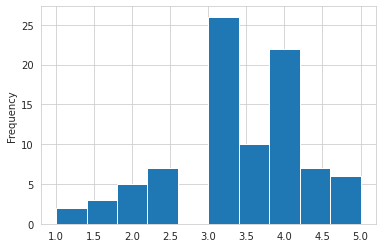

In [0]:
plot_filme(2012) 

In [0]:
plot_filme(1088) 

In [0]:
plot_filme(7048) 

Desafio 3 - Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
os_10_filmes_mais_votados = filmes_com_media_e_total.sort_values('total', ascending=False).head(10)
os_10_filmes_mais_votados

In [0]:
id_dos_10_mais_votados = os_10_filmes_mais_votados['filmeId']
id_dos_10_mais_votados
for (index, idFilme) in id_dos_10_mais_votados.iteritems():
  plot_filme(idFilme)
  print(idFilme)
  print('')
  print('')